In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split

In [61]:
# get the data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
# get the close price
series = df['close'].values.reshape(-1, 1)

In [62]:
series.shape

(1259, 1)

In [63]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

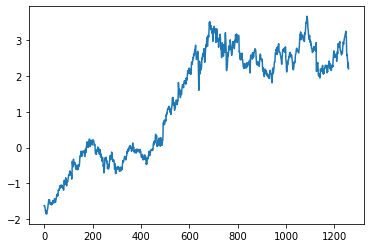

In [64]:
# plot it
plt.plot(series)
plt.show()

In [65]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)

In [66]:
print(len(X))
print(X[0])
print(len(X[0]))
print(len(series) - T)

1249
[-1.62500489 -1.64174953 -1.6330132  -1.66431839 -1.68470317 -1.77279453
 -1.76478623 -1.84778139 -1.84486928 -1.78517101]
10
1249


In [67]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10) Y.shape (1249,)


In [68]:
print(X.shape)
print(X[0])
print(Y.shape)
print(Y[0])
print(N)

(1249, 10)
[-1.62500489 -1.64174953 -1.6330132  -1.66431839 -1.68470317 -1.77279453
 -1.76478623 -1.84778139 -1.84486928 -1.78517101]
(1249,)
-1.8550616725763345
1249


In [79]:
Xtrain, Ytrain = X[:-N // 2], Y[:-N // 2]
Xtest, Ytest = X[-N // 2:], Y[-N // 2:]
print(len(Xtrain), len(Xtest))
print(len(Ytrain), len(Ytest))

Xtrain, Xtest = train_test_split(X, test_size=0.5)
Ytrain, Ytest = train_test_split(Y, test_size=0.5) 
print(len(Xtrain), len(Xtest))
print(len(Ytrain), len(Ytest))

624 625
624 625
624 625
624 625


In [80]:
# build and train the model
model = LinearRegression()
model.fit(Xtrain, Ytrain)

# Make predictions
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [87]:
print(model)
print(model.get_params)
print(model.n_jobs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
None


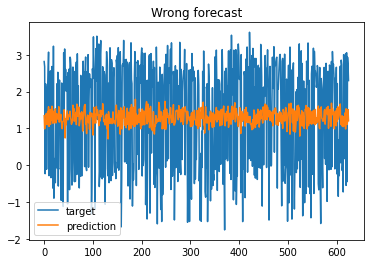

In [81]:
# wrong forecast
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

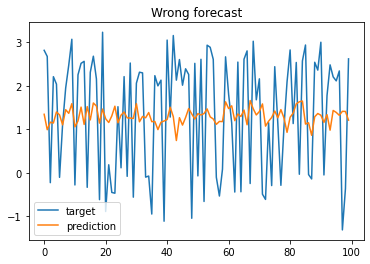

In [88]:
# wrong forecast zoom in
plt.plot(Ytest[:100], label='target')
plt.plot(Ptest[:100], label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

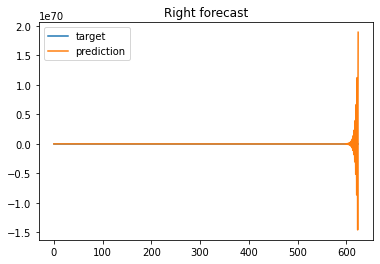

In [89]:
# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
    f = model.predict(input_.reshape(1, T))[0]
    forecast.append(f)

    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()

In [90]:
# inverse transform
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [91]:
# Print the MAE
# Train is better than naive but test is worse
print("linear train mae:", mae(Ytrain2, Ptrain2))
print("linear test mae:", mae(Ytest2, Ptest2))

linear train mae: 9.503859341257858
linear test mae: 9.387512965196887
